# Telecom User Analytics

## Task 3 - Experience Analytics

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.cluster import KMeans
import plotly.graph_objects as go  
from IPython.display import Image
import plotly.express as px
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
pd.set_option('display.max_column',None)
data= pd.read_excel('D:\\Digicrome classes\\NextHIkes\\Project 5\\telcom_data (2).xlsx')

In [3]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
##### * Average TCP retransmission
##### * Average RTT
##### * Handset type
##### * Average throughput

In [4]:
df = data[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]

In [5]:
df['MSISDN/Number'].fillna(value=df['MSISDN/Number'].mean(), inplace=True)

In [6]:
df.head(10)

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.0,5.0,NaN,NaN,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.0,5.0,NaN,NaN,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6.0,9.0
3,3.375034e+10,undefined,NaN,NaN,NaN,NaN,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,NaN,NaN,NaN,NaN,6.0,9.0
5,3.366819e+10,undefined,NaN,NaN,NaN,NaN,70.0,54.0
6,3.366537e+10,Huawei Mate 20 Lite,102.0,5.0,NaN,NaN,22.0,38.0
7,3.376349e+10,undefined,39.0,18.0,19520.0,NaN,3698.0,416.0
8,3.369874e+10,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,46.0,49.0
9,3.365922e+10,Samsung Galaxy Note 8 (Sm-N950F Ds),97.0,7.0,3231397.0,7230.0,3845.0,2535.0


In [7]:
df['Avg RTT DL (ms)'].fillna(value=df['Avg RTT DL (ms)'].mean(), inplace=True)
df['Avg RTT UL (ms)'].fillna(value=df['Avg RTT UL (ms)'].mean(), inplace=True)

In [8]:
df['Avg Bearer TP DL (kbps)'].fillna(value=df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(value=df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

In [9]:
df['TCP DL Retrans. Vol (Bytes)'].fillna(value=df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
df['TCP UL Retrans. Vol (Bytes)'].fillna(value=df['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)

In [10]:
df.isnull().sum(axis=0)

MSISDN/Number                    0
Handset Type                   572
Avg RTT DL (ms)                  0
Avg RTT UL (ms)                  0
TCP DL Retrans. Vol (Bytes)      0
TCP UL Retrans. Vol (Bytes)      0
Avg Bearer TP DL (kbps)          0
Avg Bearer TP UL (kbps)          0
dtype: int64

In [11]:
df['Avg Bearer TP DL (kbps)'].fillna(value=df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(value=df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)

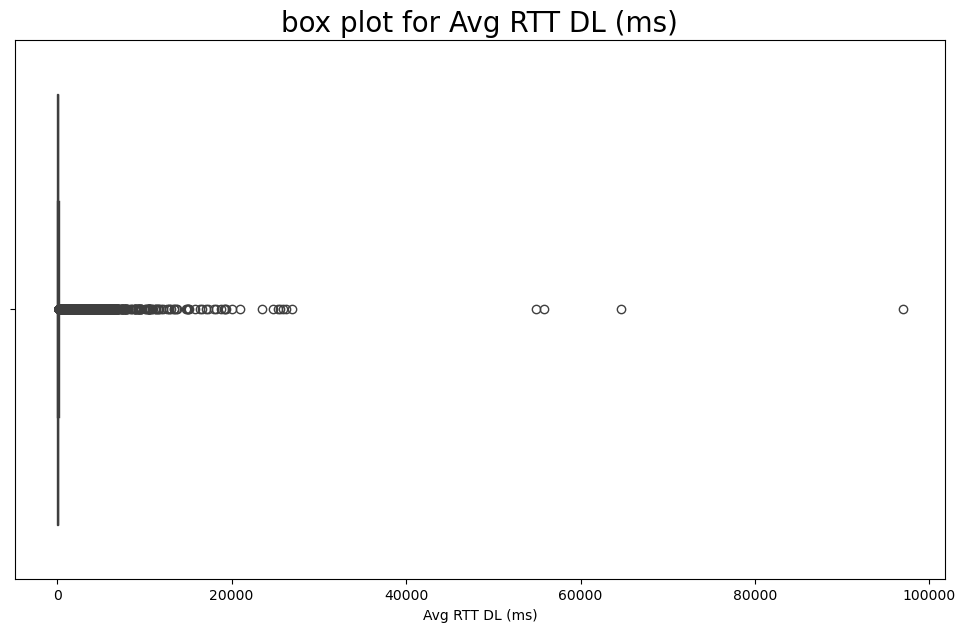

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg RTT DL (ms)')
plt.title("box plot for Avg RTT DL (ms)", size=20)
plt.show()

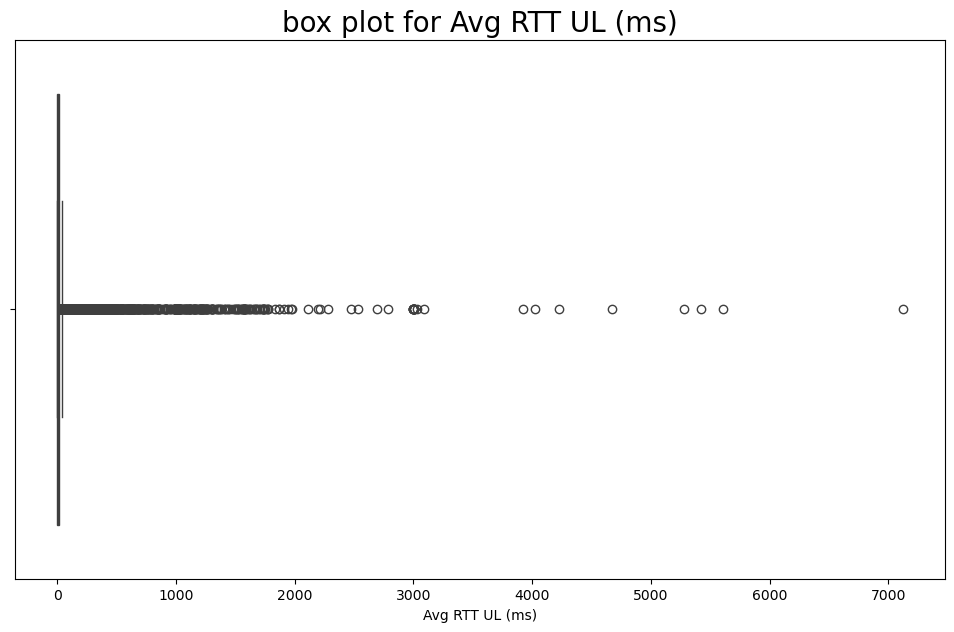

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg RTT UL (ms)')
plt.title("box plot for Avg RTT UL (ms)", size=20)
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

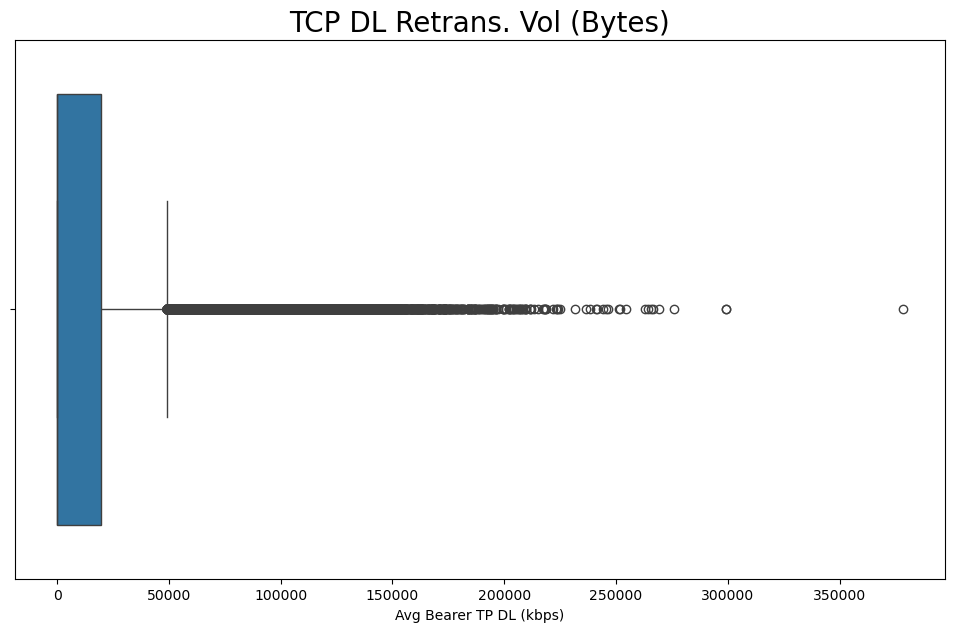

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg Bearer TP DL (kbps)')
plt.title("TCP DL Retrans. Vol (Bytes)", size=20)
plt.show()

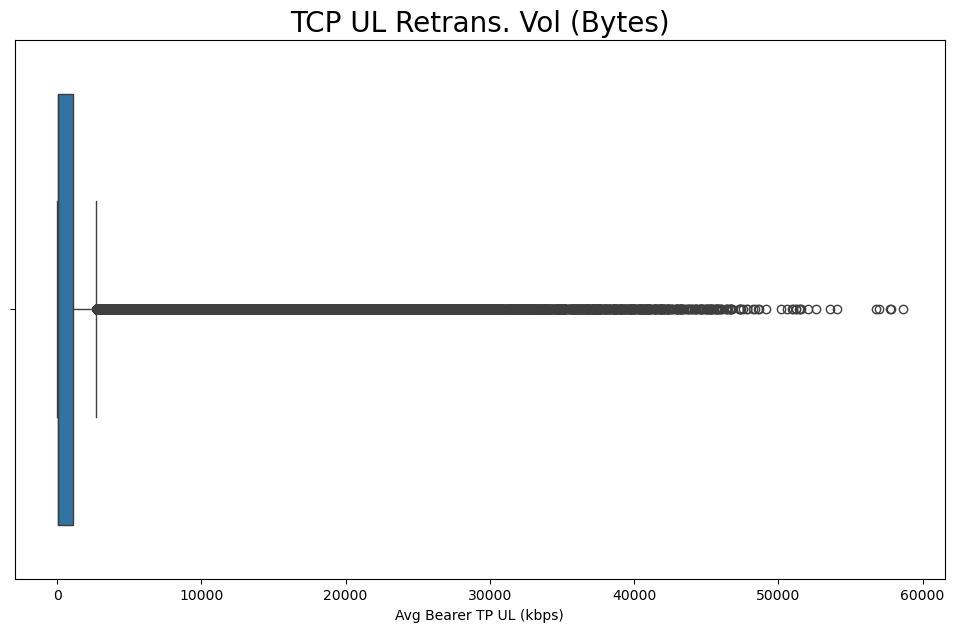

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg Bearer TP UL (kbps)')
plt.title("TCP UL Retrans. Vol (Bytes)", size=20)
plt.show()

In [17]:
df['Avg RTT DL (ms)'] = np.where(df['Avg RTT DL (ms)'] > 220, 54, df['Avg RTT DL (ms)'])

In [18]:
#Printing the median and percentile of Avg RTT UL (ms)
df['Avg RTT UL (ms)'].describe()

count    150001.000000
mean         17.662883
std          76.529933
min           0.000000
25%           3.000000
50%           7.000000
75%          17.662883
max        7120.000000
Name: Avg RTT UL (ms), dtype: float64

In [19]:
df['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.169484
std          37.817597
min           0.000000
25%          35.000000
50%          54.000000
75%         104.000000
max         220.000000
Name: Avg RTT DL (ms), dtype: float64

In [20]:
avg_tp_uldl_columns = [
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]
avg_tp_uldl = data[avg_tp_uldl_columns].sum()

In [21]:
handsets_data = df.groupby('Handset Type')

<Axes: xlabel='Handset Type'>

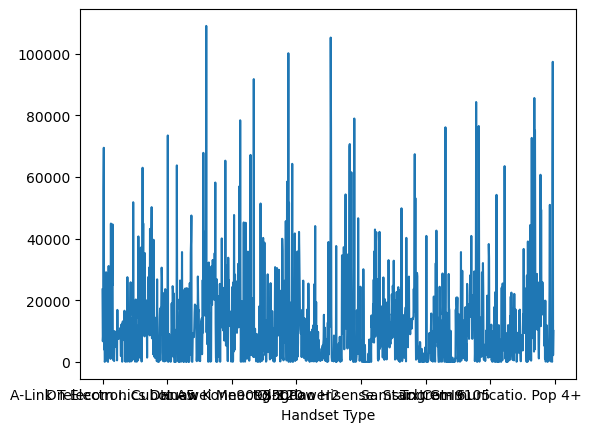

In [22]:
handsets_tp = handsets_data[avg_tp_uldl_columns].mean().sum(axis=1)
handsets_tp.plot()

In [23]:
df['Total_Avg_RTT'] = df['Avg RTT DL (ms)'] + \
                                      df['Avg RTT UL (ms)']

df['Total_Avg_Bearer_TP'] = df['Avg Bearer TP DL (kbps)'] + \
                                      df['Avg Bearer TP DL (kbps)']

df['Total_Avg_TCP'] = df['TCP DL Retrans. Vol (Bytes)'] + \
                                      df['TCP UL Retrans. Vol (Bytes)']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                150001 non-null  float64
 1   Handset Type                 149429 non-null  object 
 2   Avg RTT DL (ms)              150001 non-null  float64
 3   Avg RTT UL (ms)              150001 non-null  float64
 4   TCP DL Retrans. Vol (Bytes)  150001 non-null  float64
 5   TCP UL Retrans. Vol (Bytes)  150001 non-null  float64
 6   Avg Bearer TP DL (kbps)      150001 non-null  float64
 7   Avg Bearer TP UL (kbps)      150001 non-null  float64
 8   Total_Avg_RTT                150001 non-null  float64
 9   Total_Avg_Bearer_TP          150001 non-null  float64
 10  Total_Avg_TCP                150001 non-null  float64
dtypes: float64(10), object(1)
memory usage: 12.6+ MB


#### Compute & list 10 of the top, bottom and most frequent:
##### *TCP values in the dataset.
##### *RTT values in the dataset.
##### *Throughput values in the dataset.

### Listing the top, bottom and most frequent TCP values in the dataset.

In [34]:
sorted_by_tcp = df.sort_values('Total_Avg_TCP', ascending=False)
top_10 = sorted_by_tcp.head(10)['Total_Avg_TCP']
last_10 = sorted_by_tcp.tail(10)['Total_Avg_TCP']
most_10 = df['Total_Avg_TCP'].value_counts().head(10)


In [35]:
#printing the top 10 valuse first
top_10

34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
Name: Total_Avg_TCP, dtype: float64

In [36]:
#printing the Last 10 valuse first
last_10

12849     143.0
83214     134.0
95955     134.0
99947     129.0
8794      128.0
97061     113.0
13142     108.0
18417     106.0
111100     97.0
143594     86.0
Name: Total_Avg_TCP, dtype: float64

In [37]:
#printing the most 10 valuse first
most_10

Total_Avg_TCP
2.156957e+07    85265
2.081121e+07      650
7.609887e+05      249
2.081124e+07      248
7.596967e+05      136
7.597507e+05      132
2.081123e+07      132
7.623187e+05      121
7.609767e+05      106
2.081257e+07       99
Name: count, dtype: int64

### Listing the top, bottom and most frequent RTT values in the dataset

In [38]:
sorted_by_RTT = df.sort_values(
    'Total_Avg_RTT', ascending=False)
top_10 = sorted_by_RTT.head(10)['Total_Avg_RTT']
last_10 = sorted_by_RTT.tail(10)['Total_Avg_RTT']
most_10 = df['Total_Avg_RTT'].value_counts().head(10)

In [39]:
#printing the top 10 valuse first
top_10

20013     7158.0
132554    5660.0
85010     5453.0
183       5405.0
95341     4709.0
42087     4280.0
49591     4064.0
137931    3994.0
124860    3108.0
45992     3092.0
Name: Total_Avg_RTT, dtype: float64

In [40]:
#printing the Last 10 valuse first
last_10

8756      6.0
123210    6.0
103544    5.0
144923    4.0
50966     4.0
71738     2.0
143878    0.0
42602     0.0
103321    0.0
124538    0.0
Name: Total_Avg_RTT, dtype: float64

In [41]:
#printing the most 10 valuse first
most_10

Total_Avg_RTT
127.458589    27801
29.000000      4993
39.000000      4222
38.000000      2761
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
59.000000      2206
41.000000      1978
Name: count, dtype: int64

### Listing the top, bottom and most frequent Throughput values in the dataset

In [42]:
sorted_by_Bearer_TP = df.sort_values(
    'Total_Avg_Bearer_TP', ascending=False)
top_10 = sorted_by_Bearer_TP.head(10)['Total_Avg_Bearer_TP']
last_10 = sorted_by_Bearer_TP.tail(10)['Total_Avg_Bearer_TP']
most_10 = df['Total_Avg_Bearer_TP'].value_counts().head(10)

In [43]:
#printing the top 10 valuse first
top_10

120876    756320.0
141250    598514.0
143670    598004.0
149616    552080.0
92177     538724.0
117776    532664.0
115836    530880.0
89567     528896.0
116550    526094.0
41551     508506.0
Name: Total_Avg_Bearer_TP, dtype: float64

In [44]:
#printing the Last 10 valuse first
last_10

73812     0.0
144265    0.0
73874     0.0
73670     0.0
73350     0.0
73521     0.0
73122     0.0
73150     0.0
72895     0.0
23538     0.0
Name: Total_Avg_Bearer_TP, dtype: float64

In [45]:
#printing the most 10 valuse first
most_10

Total_Avg_Bearer_TP
46.0     7324
86.0     4352
88.0     4186
12.0     3983
44.0     2867
96.0     2778
126.0    2757
84.0     2689
90.0     2644
94.0     2263
Name: count, dtype: int64

### Compute & report:
##### 1)The distribution of the average throughput per handset type and provide interpretation for your findings.
##### 2)The average TCP retransmission view per handset type and provide interpretation for your findings

In [46]:
handset_type_agg = df.groupby('Handset Type').agg(
    {'Total_Avg_Bearer_TP': 'mean', 'Total_Avg_TCP': 'mean'})
handset_type_agg.head()

,Total_Avg_Bearer_TP,Total_Avg_TCP
Handset Type,,
A-Link Telecom I. Cubot A5,46368.0,2.156957e+07
A-Link Telecom I. Cubot Note Plus,13054.0,6.162130e+05
A-Link Telecom I. Cubot Note S,17030.0,4.141173e+07
A-Link Telecom I. Cubot Nova,111334.0,1.371700e+05
A-Link Telecom I. Cubot Power,138252.0,8.041000e+03


,Total_Avg_Bearer_TP
count,1396.000000
mean,22653.920712
std,27301.590942
min,0.000000
25%,2096.214286
50%,15448.716867
75%,31590.412162
max,209338.000000


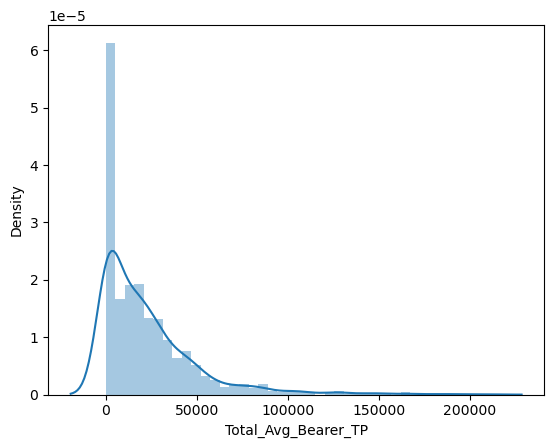

In [47]:
sorted_by_tp = handset_type_agg.sort_values('Total_Avg_Bearer_TP', ascending=False)
top_tp = sorted_by_tp['Total_Avg_Bearer_TP']
 
sns.distplot(top_tp)
pd.DataFrame(top_tp.describe()) 

### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [48]:
metrics = df[[
    "Total_Avg_RTT",
    "Total_Avg_Bearer_TP",
    "Total_Avg_TCP"]].copy()
metrics.head()

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,47.000000,46.0,2.156957e+07
1,70.000000,32.0,2.156957e+07
2,127.458589,12.0,2.156957e+07
3,127.458589,88.0,2.156957e+07
4,127.458589,12.0,2.156957e+07


In [49]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(metrics)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.401384,-0.553863,0.0
1,-0.136348,-0.554155,0.0
2,0.525765,-0.554572,0.0
3,0.525765,-0.552987,0.0
4,0.525765,-0.554572,0.0


In [50]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.586808,-0.809726,0.0
1,-0.238921,-0.971039,0.0
2,0.688008,-0.725704,0.0
3,0.689044,-0.724719,0.0
4,0.688008,-0.725704,0.0


In [51]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 2], dtype=int32)

In [52]:
df.insert(0, 'Cluster', kmeans.labels_)
df.head(10)

,Cluster,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,47.000000,46.0,2.156957e+07
1,0,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,70.000000,32.0,2.156957e+07
2,2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07
3,2,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,127.458589,88.0,2.156957e+07
4,2,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07
5,2,3.366819e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,70.0,54.0,127.458589,140.0,2.156957e+07
6,2,3.366537e+10,Huawei Mate 20 Lite,102.000000,5.000000,2.080991e+07,759658.664811,22.0,38.0,107.000000,44.0,2.156957e+07
7,0,3.376349e+10,undefined,39.000000,18.000000,1.952000e+04,759658.664811,3698.0,416.0,57.000000,7396.0,7.791787e+05
8,2,3.369874e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,46.0,49.0,127.458589,92.0,2.156957e+07
9,2,3.365922e+10,Samsung Galaxy Note 8 (Sm-N950F Ds),97.000000,7.000000,3.231397e+06,7230.000000,3845.0,2535.0,104.000000,7690.0,3.238627e+06


In [56]:
df.to_csv('D:\\Digicrome classes\\NextHIkes\\Project 5\\User_Experience.csv')

### Save the Model

In [58]:
import pickle
with open("D:\\Digicrome classes\\NextHIkes\\Project 5\\models\\user_exp.pkl", "wb") as f:
    pickle.dump(kmeans, f)